# Problem statement

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
fraud = pd.read_csv("Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.shape

(600, 6)

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<b>We could see there are no null values in our dataset</b>

In [6]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


<b>No duplicate rows are found</b>

<b>Let's rename the columns for simplicity</b>

In [7]:
fraud.columns = ['Undergrad','Marital','Tx_income','c_population','exp','Urban']

In [8]:
fraud

,Undergrad,Marital,Tx_income,c_population,exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Understanding the target variable

Our main objective is to to prepare a model on fraud data by treating those who have taxable_income <= 30000 as "Risky" and others are "Good". So Taxable.Income is our target variable. As Taxable.Income is an int datatype in our dataset, we need to convert it into categorical for our problem statement.

In [9]:
fraud[fraud['Tx_income']<=30000].value_counts()

Undergrad  Marital   Tx_income  c_population  exp  Urban
YES        Single    27394      132859        18   YES      1
NO         Single    20109      39360         10   NO       1
           Married   24370      81593         14   YES      1
                     25062      114823        11   NO       1
                     27143      128996        3    YES      1
                                                           ..
YES        Married   19060      145744        9    YES      1
                     20391      86648         16   YES      1
                     20719      103614        24   NO       1
                     21016      140762        26   NO       1
NO         Divorced  10329      140885        7    YES      1
Length: 124, dtype: int64

In [10]:
fraud[fraud['Tx_income']>30000].value_counts()

Undergrad  Marital   Tx_income  c_population  exp  Urban
YES        Single    99619      86896         29   NO       1
NO         Single    35922      77719         28   NO       1
           Married   98334      74052         30   NO       1
                     98416      31156         13   YES      1
           Single    31629      53848         10   NO       1
                                                           ..
YES        Married   39114      125987        3    YES      1
                     39444      148821        6    NO       1
                     39476      57194         25   NO       1
                     39818      148068        13   NO       1
NO         Divorced  31409      85128         22   NO       1
Length: 476, dtype: int64

We could see that there are 124 observations with taxable income less than 30,000 and 476 observations with income more than 30000

In [11]:
fraud['Tx_income'].max()

99619

In [12]:
fraud['Tx_income'].min()

10003

<b>The maximum value is 99619 and minimum value is 10003. We will use cut function of pandas to create bins and divide the taxable_income into 2 categories (<=30000 and >30000)</b>

In [13]:
fraud["Tx_income"] = pd.cut(fraud["Tx_income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [14]:
fraud

,Undergrad,Marital,Tx_income,c_population,exp,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


We have 3 columns which are categorical which are Undergrad,Marital, Urban. Let's convert them into continuous.

In [15]:
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [16]:
fraud['Marital'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital, dtype: int64

In [17]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [18]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital','Urban'])

In [19]:
fraud

,Tx_income,c_population,exp,Undergrad_NO,Undergrad_YES,Marital_Divorced,Marital_Married,Marital_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [20]:
label_encoder = preprocessing.LabelEncoder() 
 
fraud['Tx_income']= label_encoder.fit_transform(fraud['Tx_income']) 

In [21]:
fraud

,Tx_income,c_population,exp,Undergrad_NO,Undergrad_YES,Marital_Divorced,Marital_Married,Marital_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


In [22]:
fraud['Tx_income'].value_counts()

0    476
1    124
Name: Tx_income, dtype: int64

<AxesSubplot:xlabel='Tx_income', ylabel='count'>

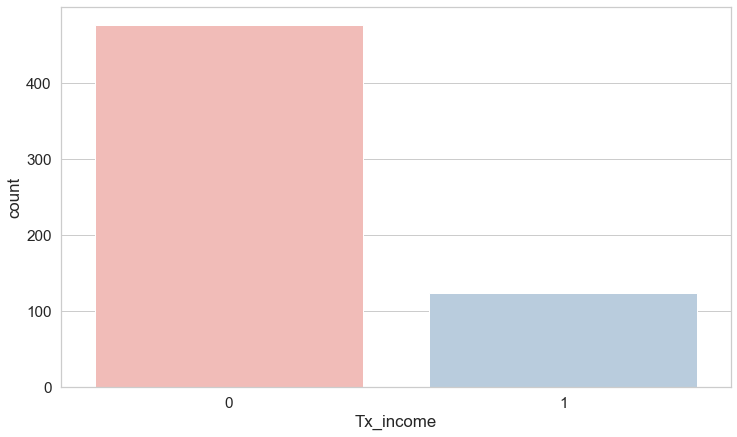

In [23]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'Tx_income', data = fraud, palette = 'Pastel1')

<b>The data is imbalanced</b>

In [24]:
X = fraud.drop('Tx_income',axis=1)
X

,c_population,exp,Undergrad_NO,Undergrad_YES,Marital_Divorced,Marital_Married,Marital_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [25]:
Y = fraud['Tx_income']
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tx_income, Length: 600, dtype: int32

# Balancing the data

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

In [28]:
x_resample, y_resample = sm.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [29]:
y_df.value_counts()

Tx_income
1            476
0            476
dtype: int64

In [30]:
X_train, X_test,Y_train,Y_test = train_test_split(x_resample,y_resample, test_size=0.2,random_state=30)

In [34]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [35]:
X_train_norm.shape

(761, 9)

In [36]:
X_test_norm.shape

(191, 9)

# Random Forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
forest_new = RandomForestClassifier(n_estimators=140,max_depth=5,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(X_train_norm, Y_train)

RandomForestClassifier(max_depth=5, min_samples_split=20, n_estimators=140)

### Predicting on train data set

In [40]:
pred_rf_train = forest_new.predict(X_train_norm) # predicting on train data set 
pd.Series(pred_rf_train).value_counts()

0    488
1    273
dtype: int64

In [41]:
pd.crosstab(Y_train,pred_rf_train)

col_0,0,1
Tx_income,,
0,374,4
1,114,269


### Predicting on test data set

In [42]:
pred_rf_test  = forest_new.predict(X_test_norm) 
pd.Series(pred_rf_test).value_counts()

0    128
1     63
dtype: int64

In [43]:
pd.crosstab(Y_test,pred_rf_test)

col_0,0,1
Tx_income,,
0,96,2
1,32,61


<b>Checking accuracy</b>

In [44]:
accuracy = accuracy_score(Y_test,pred_rf_test)
print(accuracy)

0.8219895287958116


In [46]:
accuracy = accuracy_score(Y_train,pred_rf_train)
print(accuracy)

0.8449408672798949


In [47]:
print(classification_report(Y_test,pred_rf_test))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        98
           1       0.97      0.66      0.78        93

    accuracy                           0.82       191
   macro avg       0.86      0.82      0.82       191
weighted avg       0.86      0.82      0.82       191



Accuracy of both test and train data are nearly equal. 